In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/wisc_bc_data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
df.shape

(569, 32)

In [6]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

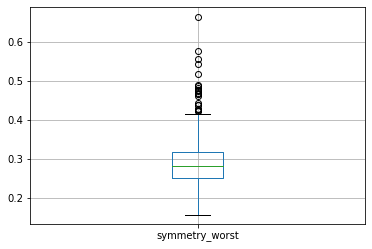

In [7]:
df.boxplot(column=['symmetry_worst'])
plt.show()

In [8]:
dummies=pd.get_dummies(df[['diagnosis']],
                       columns=['diagnosis'],
                       drop_first=True)
df=pd.concat([df,dummies],axis=1)

In [9]:
columns=['diagnosis']
df.drop(columns,axis=1,inplace=True)

In [10]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis_M


In [11]:
df.head(25)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis_M
0,87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,...,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771,0
1,8910251,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,...,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587,0
2,905520,11.04,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,...,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881,0
3,868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,...,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784,0
4,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,...,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766,0
5,906539,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,...,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284,0
6,925291,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,...,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,0
7,87880,13.81,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,0.2251,...,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860,1
8,862989,10.49,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,...,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552,0
9,89827,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,...,19.90,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080,0


In [12]:
x=df.drop(['diagnosis_M'],axis=1)
y=df[['diagnosis_M']]

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,train_size=0.7,random_state=1)

In [119]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [120]:
reg.score(x_train,y_train)

0.6105527638190955

In [121]:
reg.score(x_test,y_test)

0.6666666666666666

In [63]:
predictions=reg.predict(x_test)

In [18]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       114
           1       0.00      0.00      0.00        57

    accuracy                           0.67       171
   macro avg       0.33      0.50      0.40       171
weighted avg       0.44      0.67      0.53       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)


array([[114,   0],
       [ 57,   0]], dtype=int64)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [21]:
xscaled=x.apply(zscore)
xscaled.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,2.497514e-17,-1.287781e-16,-7.373520e-16,-1.303390e-16,-2.239958e-16,1.660457e-16,1.882891e-16,5.112099e-17,-4.760886e-17,1.465338e-16,...,-8.507157e-17,6.634022e-18,-3.570665e-16,-1.888745e-16,-2.234104e-16,7.999850e-18,9.033976e-17,2.224348e-16,2.734583e-16,1.851672e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.430790e-01,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-2.361897e-01,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.358950e-01,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,-1.725930e-01,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,7.052629e+00,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [89]:
x_train, x_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.65,train_size=0.35,random_state=1)

In [90]:
NNH=KNeighborsClassifier(n_neighbors=9)

In [91]:
NNH.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [92]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.9621621621621622

In [93]:
NNH.score(x_train,y_train)

0.949748743718593